### - Sobhan Moradian Daghigh
#### - 7/7/2022
#### - Convex - HW03 - Q9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.io as sio
from numpy.random import permutation
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import accuracy_score

In [2]:
def plotter(images, names=None, subplots=None, gray=False):
    if subplots is None:
        plt.figure(figsize=(5, 6))
        plt.imshow(images, cmap='gray') if gray else plt.imshow(images)
        plt.title(names)
        plt.axis('off')
    else:
        fig, ax = plt.subplots(subplots[0], subplots[1], figsize=(subplots[1] * 4, subplots[0] * 4))
        for i, (img, name, ax) in enumerate(zip(images, names, fig.axes)):
            ax.imshow(img, cmap='gray') if gray else ax.imshow(img)
            ax.set_title(name)
            ax.axis('off')
    plt.show()

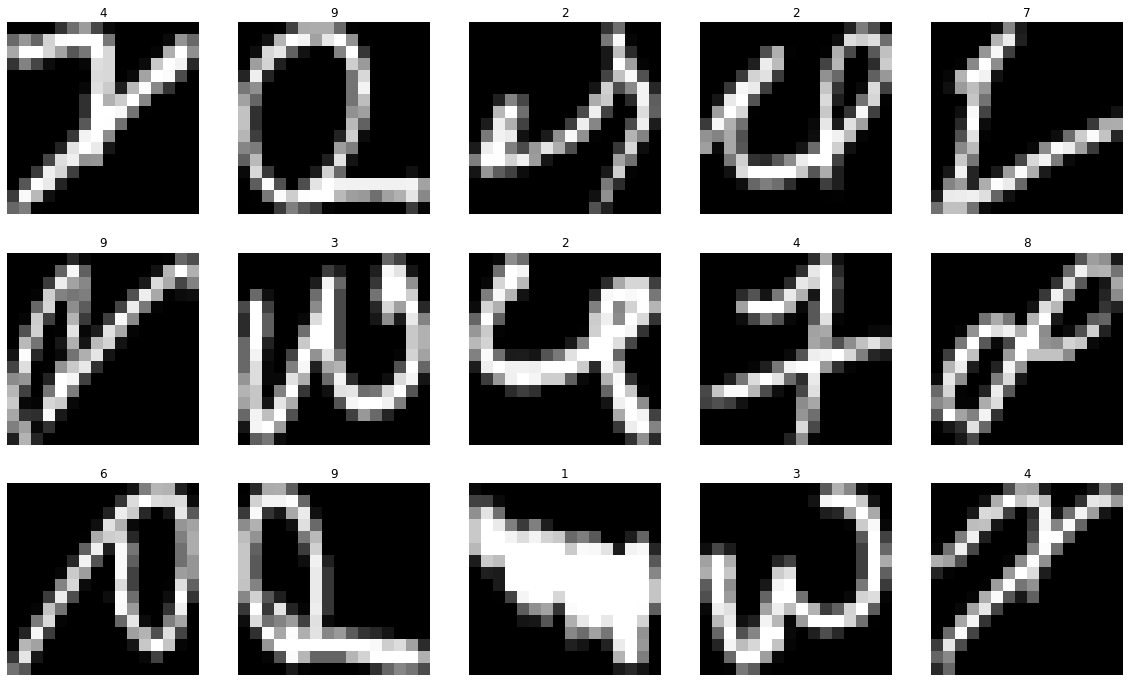

In [3]:
# From main.py

def to_onehot(label):
    m = len(set(label))
    n = len(label)
    onehot_matrix = np.zeros([n, m])
    for i in range(n):
        onehot_matrix[i, label[i]] = 1
    return onehot_matrix


def load_USPS_data_instace(path, sample_per_class):
    data = sio.loadmat(path)
    img = data['data']
    img_data = []
    label = []
    for i in range(img.shape[-1]):
        temp_sample_list = []
        for j in range(img.shape[1]):
            temp = np.reshape(img[:, j, i], [16, 16])
            temp_sample_list.append(temp)

        idx = permutation(len(temp_sample_list))
        idx = idx[:sample_per_class]
        selected_samples = [temp_sample_list[x].astype(np.uint8) for x in idx]
        selected_labels = [(i + 1) % 10 for _ in idx]
        img_data.extend(selected_samples)
        label.extend(selected_labels)

    img_data = np.array(img_data)
    img_data = img_data.astype('float')
    label = np.array(label[:])
    oh_label = to_onehot(label)
    return img_data, label


images, labels = load_USPS_data_instace('./USPSdata/usps_all.mat', 100)
idxs = permutation(len(images))
plotter(images[idxs], labels[idxs], subplots=(3, 5), gray=True)
images = np.reshape(images, [images.shape[0], -1])

In [4]:
kneighbor = 10
n_class = 10

part1 = (kneighbors_graph(images, 10, mode='distance', include_self=True)).toarray()
sigma = (1 / 3)  * (part1.sum() / (kneighbor * n_class))
W = np.exp(np.divide(np.power(part1, 2), (2 * np.power(sigma, 2))))

In [5]:
D = 10 * np.identity(W.shape[0])

In [6]:
L = D - W

In [11]:
percentages = [0.3, 0.4, 0.6, 0.9]

for p in percentages:
    
    x_train_len = int(p * labels.shape[0])

    # S.T * x = y
    y = np.zeros((x_train_len, 1))
    y_pred_idxs = list(set(range(0, labels.shape[0])) ^ set(idxs))
    idxs = random.sample(range(0, labels.shape[0]), x_train_len)

    S = np.zeros((labels.shape[0], x_train_len))
    for i, idx in zip(range(x_train_len), idxs):
        S[idx][i] = 1
        y[i] = labels[idx]

    inv_L = np.linalg.inv(L)
    term1 = np.linalg.inv(np.dot(np.dot(S.T, inv_L), S))
    term2 = np.dot(np.dot(inv_L, S), term1)
    result = [int(np.abs(ele[0])) for ele in np.dot(term2, y).round(0)]
    
    y_pred = [result[i] for i in y_pred_idxs]
    y_true = [labels[i] for i in y_pred_idxs]
    
    acc = accuracy_score(y_true, y_pred)    
    
    print('The accuracy when we use  {}%  of data for training is:  {:<5.2f}'.format(p * 100, acc))

The accuracy when we use  30.0%  of data for training is:  0.30 
The accuracy when we use  40.0%  of data for training is:  0.47 
The accuracy when we use  60.0%  of data for training is:  0.65 
The accuracy when we use  90.0%  of data for training is:  0.89 


### Finito